# Grupo 14:
- Mario Campos Vicente
- Gonzalo Lardiés Guillén
- Adrián Sequera Robledo

Importamos los módulos:

In [2]:
import tkinter
import matplotlib
matplotlib.use('TKAgg')
from main import get_points, RegionGrowingP2, plot_images

Seleccionamos las 3 imágenes que vamos a utilizar:

In [3]:
plot_images(["D0120.dcm","D0010.dcm","D0273.dcm"])

A continuación vamos aplicar crecimiento de regiones modificando distintos parámetros de nuestra función:
- Rango de grises
- Número de pixeles vecinos

**1) Imágenes de segmentación de los pulmones**

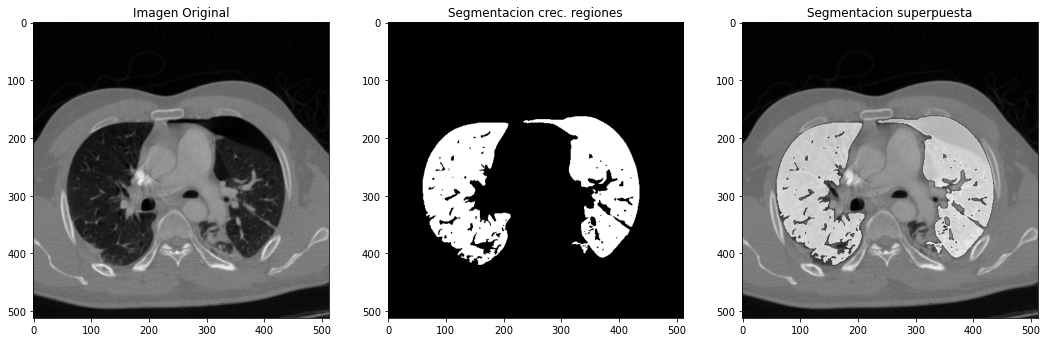

In [4]:
seed_coord,img = get_points("D0120.dcm") # situamos las semillas en los pulmones
%matplotlib inline
final_image = RegionGrowingP2(img,0.05,0.05,seed_coord) # Umbrales = 0.05, vecindad = 8

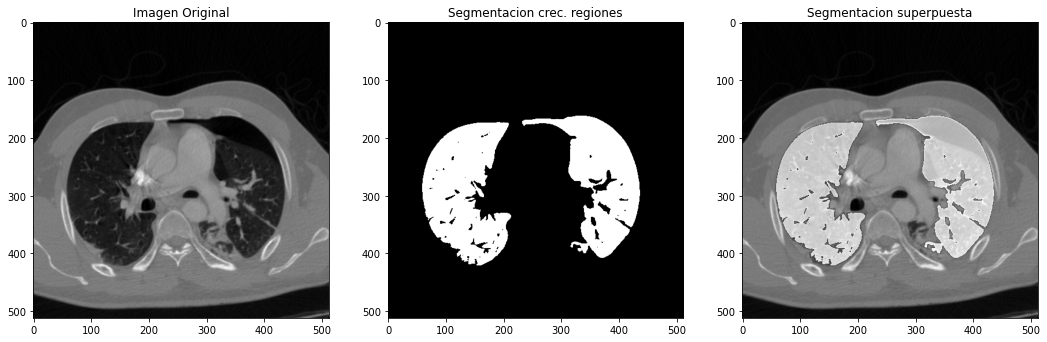

In [5]:
#Aumento del valor de los umbrales
%matplotlib inline
final_image = RegionGrowingP2(img,0.1,0.1,seed_coord) #Umbral = 0.1, vecindad = 8 

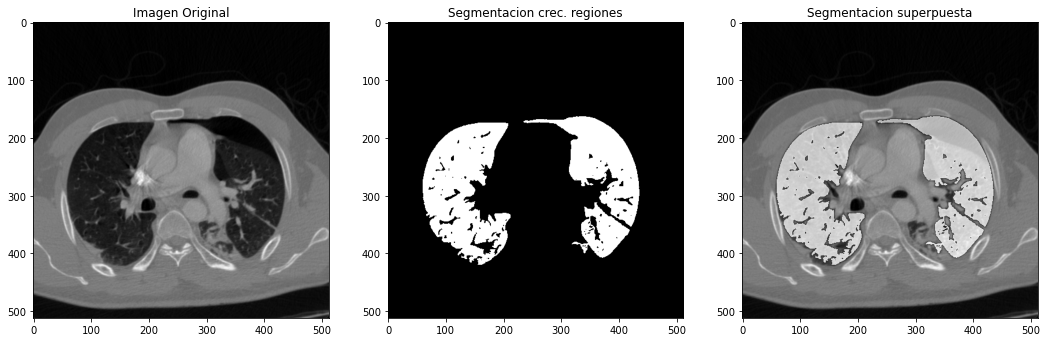

In [6]:
# Reducción de la vecindad con mismos umbrales
%matplotlib inline
final_image = RegionGrowingP2(img,0.05,0.05,seed_coord,connectivity = 1) #Umbral = 0.05, vecindad = 4

Se puede observar que aumentando el umbral, la segmentación es menos selectiva y no es tan detallada. Se aprecia por ejemplo en las venas pulmonares: en el segundo set de imágenes no se ven tan bien definidas como en el primero.

Si se cambia a la modalida de vecindad a 4 (tercer set de imágenes), se notan diferencias en los bordes de la segmentación fundamentalmente. Donde se ve claramente es en la parte superior del pulmón derecho (entre el tercer y el primer set de imágenes a igualdad de umbral)

**2) Imágenes de segmentación de la columna vertebral**

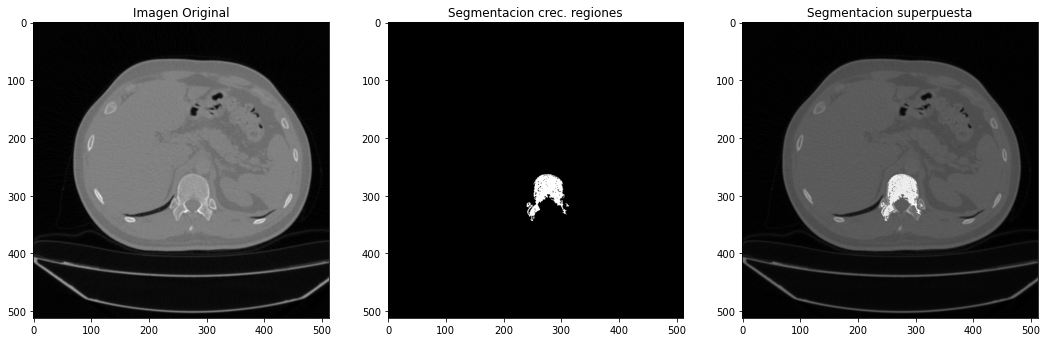

In [7]:
seed_coord,img = get_points("D0010.dcm") # situamos las semillas en la columna vertebral
%matplotlib inline
final_image = RegionGrowingP2(img,0.03,0.03,seed_coord) #Umbrales = 0.03, vecindad = 8

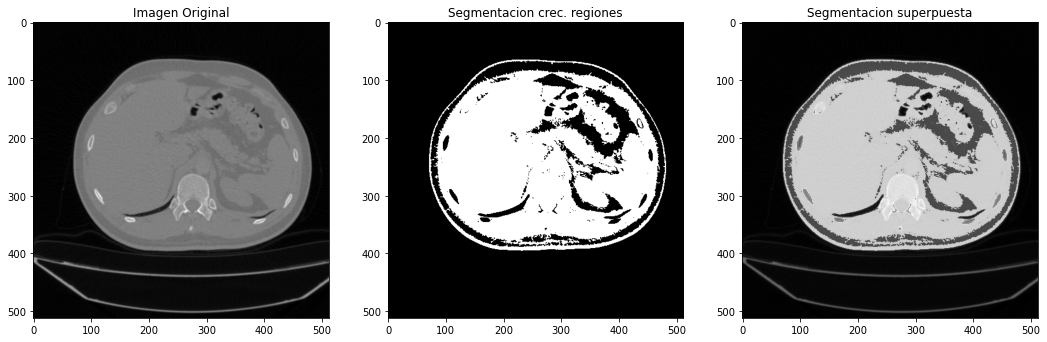

In [8]:
#Aumento del valor de los umbrales
%matplotlib inline
final_image = RegionGrowingP2(img,0.1,0.1,seed_coord) #Umbrales = 0.1, vecindad = 8

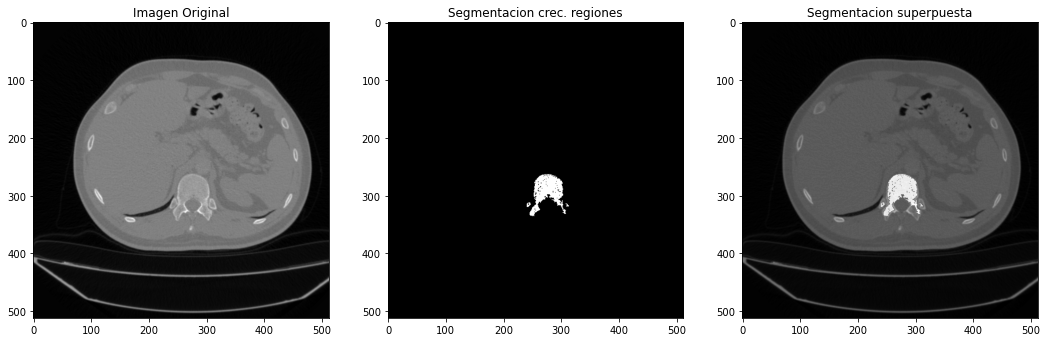

In [9]:
#Reducción de la vecindad con mismos umbrales
%matplotlib inline
final_image = RegionGrowingP2(img,0.03,0.03,seed_coord,connectivity = 1) #Umbrales = 0.03, vecindad = 4

En este caso, si aumentamos el umbral, no logramos segmentar nada porque partimos de una imagen con un rango de grises bastante homogéneo. 

Si se cambia a la modalida de vecindad a 4 (tercer set de imágenes), se notan diferencias en los bordes de la segmentación al igual que en los pulmones. En este caso no es tan notorio

**3) Imágenes de segmentación del húmero**

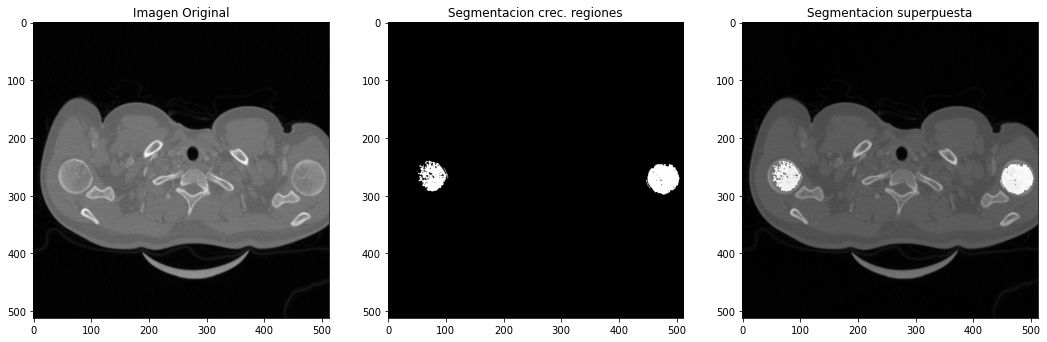

In [10]:
seed_coord,img = get_points("D0273.dcm") # situamos las semillas en el húmero
%matplotlib inline
final_image = RegionGrowingP2(img,0.03,0.03,seed_coord) #Umbrales = 0.03, vecindad = 8

In [ ]:
#Aumento del valor de los umbrales
%matplotlib inline
final_image = RegionGrowingP2(img,0.05,0.05,seed_coord) #Umbrales = 0.05, vecindad = 8

In [ ]:
#Reducción de la vecindad con mismos umbrales
%matplotlib inline
final_image = RegionGrowingP2(img,0.03,0.03,seed_coord,connectivity = 1) #Umbrales = 0.05, vecindad = 4

En esta última segmentación, apreciamos los mismos resultados vistos en las dos anteriores. 

#### **CONCLUSIÓN SOBRE LOS RESULTADOS**

Con este método se obtienen buenos resultados introduciendo los umbrales adecuados. Hemos conseguido segmentar correctamente las tres estructuras anatómicas propuestas: pulmones (tejido blando), columna vertebral y húmero (estructuras óseas). 


La segmentación se puede ajustar mediante parámetros como la conectividad entre píxeles vecinos o los umbrales de grises (tanto inferior como superior).

#### Variación del umbral

Por la naturaleza del método de crecimiento de regiones, la elección del **umbral de grises** va a condicionar totalmente el resultado obtenido. Durante la binarización de la imagen se toman como 1 (blanco) aquellos valores que estén dentro del umbral escogido; y se toman como 0 (negro) aquellos valores que no lo estén.

Por ello, si seleccionamos un rango de grises excesivamente alto, se van a tener en cuenta distintos tipos de tejidos (niveles de gris) por lo que no conseguiremos segmentar correctamente. Si por el contrario seleccionamos un rango de grises excesivamente bajo, es posible que no entren en el umbral todos los pixeles de nuestro tejido, por lo que tampoco segmentaremos correctamente.

Concluyendo, hay que ajustar los parámetros del umbral de grises (superior e inferior) para obtener una segmentación correcta

#### Variación del tipo de vecindad

El **tipo de vecindad** influye a la hora de comprobar la conectividad de la región binaria en la que se encuentra la semilla. En nuestra implementación usamos **vecindad a 8** (tiene en cuenta los 8 píxeles de alrededor) y **vecindad a 4** (tiene en cuenta únicamente los 4 pixeles de las aristas de alrededor). 

![Imagen](https://i.ibb.co/1GkLRDY/Screenshot-1.png)

La diferencia entre ambas se puede ver fundamentalmente en los contornos. Si escogemos vecindad a 4 se recortarán un poco más los contornos ya que se requiere una continuidad más exigente. Por el contrario, si escogemos vecindad a 8, la segmentación será algo más amplia al ser menos exigente en la valoración de continuidad.